In [85]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [57]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50%; !important;}</style>"
HTML(style)

In [32]:
titanic_data = pd.read_csv('/home/kex/Documents/stepic/datascience/titanic/train.csv')

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived

In [44]:
X = pd.get_dummies(X)

In [49]:
X = X.fillna({'Age': X.Age.median()})

In [52]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [54]:
clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
clf.score(X_train,y_train)

0.9798657718120806

In [65]:
clf.score(X_test, y_test)

0.7694915254237288

In [70]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
clf.score(X_train,y_train)

0.8238255033557047

In [73]:
clf.score(X_test, y_test)

0.8203389830508474

In [74]:
max_depth_values = range(1,100)

In [90]:
scores_data = pd.DataFrame()

In [91]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [92]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.798622


In [93]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')

In [99]:
scores_data_long.query("set_type == 'cross_val_score'").head(15)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.798622
203,6,cross_val_score,0.795388
204,7,cross_val_score,0.796998
205,8,cross_val_score,0.793551
206,9,cross_val_score,0.793537
207,10,cross_val_score,0.796927


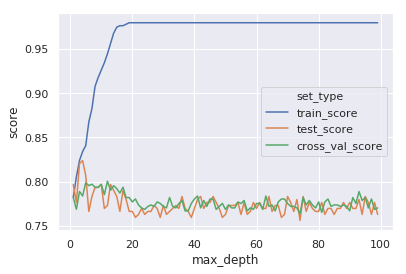

In [96]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [100]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [101]:
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.7868568105208185

In [83]:
sns.set(rc={'figure.figsize': (12,9)})

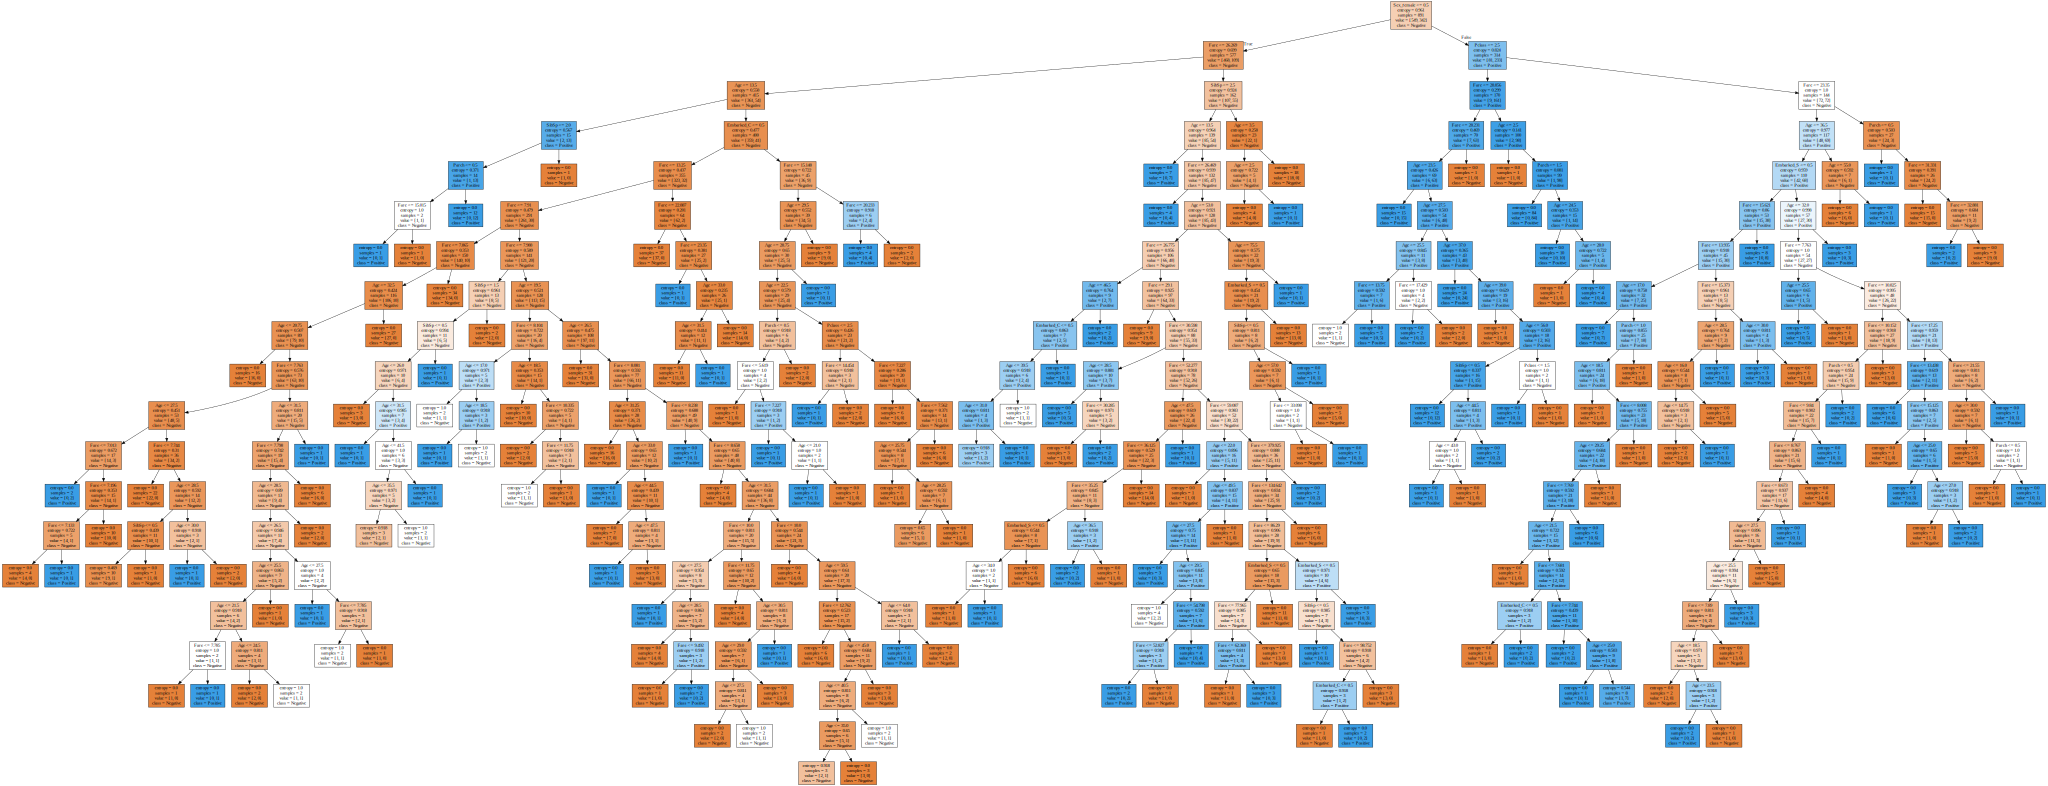

In [58]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [24]:
-1/4*np.log2(1/4)-3/4*np.log2(3/4)

0.8112781244591328

In [28]:
data2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', as_index=0)

TypeError: parser_f() got an unexpected keyword argument 'as_index'

In [26]:
data2.head()

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
